
<h1> <b> <centre> DA5401 Assignment 1 </b> </centre> </h2>
<h4> <centre> Date: 18/08/2025 </centre> </h4>


<h3> <b> Objective: </b> To narrate a hypothesis about the factors that contribute in the success of the movie. </h3>

<h3> <b> Hypothesis </b> </h3>

The success of the movie will depend on:
- The genre of the movie.
- The actor and director of the movie
- Revenue should be proportional to the popularity of the movie
- The month in which it was released (cause if the release is done in month where there are a lot of holidays, people tend to go for the movie).
- Also the success of the movie should depend on the public opinion or the average rating of the movie, because that acts as the publicity for the movie to gain more viewers. 

<h3> <b> Step 1: </b> Importing the data </h3>

In [78]:
""" Installing the KaggleHub package for dataset management in Kaggle notebooks. """
%pip install kagglehub

"""Importing necessary libraries for data manipulation and analysis."""
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter

Note: you may need to restart the kernel to use updated packages.


In [79]:
""" Import the dataset """

# Set the path to the file you'd like to load
file_path_df = "tmdb_5000_movies.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "tmdb/tmdb-movie-metadata",
  file_path_df,
)

# Set the path to the credits file you'd like to load
file_path_credits = "tmdb_5000_credits.csv"

# Load the latest version
df_credits = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "tmdb/tmdb-movie-metadata",
  file_path_credits,
)


/tmp/ipykernel_5004/1946716938.py:7: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(
/tmp/ipykernel_5004/1946716938.py:17: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_credits = kagglehub.load_dataset(


<h3> <b> Step 2: </b> Data Preprocessing and Cleaning </h2>

In [82]:
""" Getting to know about the dataframes """
print(df.info())

print("-" * 50) 

print(df_credits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [83]:
""" Check for null values in the dataset """
null_values = df.isnull().sum()
print("Null values in each column of df:\n", null_values)
null_values = df_credits.isnull().sum()
print("Null values in each column of df_credits:\n", null_values)

Null values in each column of df:
 budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64
Null values in each column of df_credits:
 movie_id    0
title       0
cast        0
crew        0
dtype: int64


The dataframe 'df' has few columns with Null values whereas the dataframe 'df_credits' has no Null values
- Null values in homepage and tagline can be ignored as they won't have any direct impact on the revenue. 
- Also Overview absolutely doesn't matter here, hence those null values can also be ignored 

In [85]:
# Checking for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows in df: {duplicates}")
duplicates = df_credits.duplicated().sum()
print(f"Number of duplicate rows in df_credits: {duplicates}")

Number of duplicate rows in df: 0
Number of duplicate rows in df_credits: 0


Hopefully there are no duplicates in the data

In [9]:
# Data and time formatting
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_date'].isnull().sum()  # Check for any null values after conversion

np.int64(1)

In [ ]:
""" Since there is only one row with null value in release_date we can ignore that row """
df.dropna(subset=['release_date'], inplace=True)
df['release_date'].isnull().sum() 

np.int64(0)

Getting the primary_genre and secondary_genre from the genres data column

In [86]:
""" Getting primary and secondary genre of the movie """
import json

df['genres'] = df['genres'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)
df['primary_genre'] = df['genres'].apply(lambda x: x[0]['name'] if isinstance(x, list) and len(x) > 0 else None)
df['primary_genre'].isnull().sum()  # Check for any null values in primary genre
df['primary_genre'].value_counts()  # Displaying the count of each primary genre

df['secondary_genre'] = df['genres'].apply(lambda x: x[1]['name'] if isinstance(x, list) and len(x) > 1 else None)
df['secondary_genre'].isnull().sum()  # Check for any null values in secondary genre
df['secondary_genre'].value_counts()  # Displaying the count of each secondary genre

secondary_genre
Drama              788
Comedy             462
Thriller           387
Romance            377
Adventure          313
Action             283
Crime              248
Family             180
Horror             140
Fantasy            139
Science Fiction    126
Mystery            124
History             91
Music               78
Animation           68
War                 23
Documentary         19
Foreign             15
Western             14
Name: count, dtype: int64

In [87]:
""" Getting the total number of cast in the movie """

df['cast'] = df_credits['cast'] = df_credits['cast'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)
df['crew'] = df_credits['crew'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)
df['total_cast'] = df['cast'].apply(lambda x: len(x) if isinstance(x, list) else 0)

In [89]:
""" Getting the lead actor and secondary actor of the movie """

df['lead_actor'] = df['cast'].apply(
    lambda x: x[0]['name'] if isinstance(x, list) and len(x) > 0 and 'name' in x[0] else None
)

df['secondary_actor'] = df['cast'].apply(
    lambda x: x[1]['name'] if isinstance(x, list) and len(x) > 1 and 'name' in x[1] else None
)

""" Replacing the null values in the lead actor with 'Unknown' """

df['lead_actor'].fillna('Unknown', inplace=True)
df['secondary_actor'].fillna('Unknown', inplace=True)



/tmp/ipykernel_5004/2882607195.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['lead_actor'].fillna('Unknown', inplace=True)
/tmp/ipykernel_5004/2882607195.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [90]:
""" Getting total_spoken_languages as one column """

df['spoken_languages'] = df['spoken_languages'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)
df['total_spoken_languages'] = df['spoken_languages'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df['total_spoken_languages'].isnull().sum()  # Check for any null values in total spoken languages

np.int64(0)

In [91]:
""" Sometimes production companies can affect the movies success """
import json

# Convert the string representations of the lists to actual lists
df['production_companies'] = df['production_companies'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)

# Now extract the main production company
df['main_production_company'] = df['production_companies'].apply(
    lambda x: x[0]["name"] if isinstance(x, list) and len(x) > 0 and isinstance(x[0], dict) and 'name' in x[0] else None
)


# replace null values in main production company with 'Unknown'
df['main_production_company'].fillna('Unknown', inplace=True)


df['main_production_company'].isnull().sum()  # Check for any null values in main production company

/tmp/ipykernel_5004/2878434616.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['main_production_company'].fillna('Unknown', inplace=True)


np.int64(0)

In [92]:
# """ Getting the primary keyword of the movie """

# df['keywords'] = df['keywords'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)
# df['primary_keyword'] = df['keywords'].apply(
#     lambda x: x[0]['name'] if isinstance(x, list) and len(x) > 0 and 'name' in x[0] else None
# )  

# # replace null values in primary keyword with 'Unknown'
# df['primary_keyword'].fillna('Unknown', inplace=True)
# df['primary_keyword'].isnull().sum()  # Check for any null values in primary keyword

In [93]:
""" Getting the major production country of the movie """

df['production_countries'] = df['production_countries'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)
df['major_production_country'] = df['production_countries'].apply(
    lambda x: x[0]['name'] if isinstance(x, list) and len(x) > 0 and 'name' in x[0] else None )
# replace null values in major production country with 'Unknown'
df['major_production_country'].fillna('Unknown', inplace=True)
df['major_production_country'].isnull().sum()  # Check for any null values in major production country

/tmp/ipykernel_5004/3269981575.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['major_production_country'].fillna('Unknown', inplace=True)


np.int64(0)

In [95]:
""" The month of release can be very important for the revenue """
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_month'] = df['release_date'].dt.month
df['release_month'].isnull().sum()  # Check for any null values in release month


np.int64(1)

In [97]:
""" Converting the crew column to a list of dictionaries """

df['crew'] = df_credits['crew'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)
df['director'] = df['crew'].apply(
    lambda x: next((member['name'] for member in x if member['job'] == 'Director'), None) if isinstance(x, list) else None
)
df['director'].isnull().sum()  # Check for any null values in director
# replace null values in director with 'Unknown'
df['director'].fillna('Unknown', inplace=True)
df['director'].head()  # Displaying the first few directors


/tmp/ipykernel_5004/3418250651.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)


0        James Cameron
1       Gore Verbinski
2           Sam Mendes
3    Christopher Nolan
4       Andrew Stanton
Name: director, dtype: object

In [107]:
""" Creating a column of month year """
df['month_year'] = df['release_date'].dt.strftime('%Y-%m')
""" Putting them in quanrterly buckets """
df['quarter'] = df['release_date'].dt.to_period('Q')
""" Creating yearly number of movies released """
df['year'] = df['release_date'].dt.year


In [110]:
""" Converting the non numeric columns to numeric """

df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')
df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')

""" Convert Director and lead actor column into numeric column """

df['lead_actor_numeric'] = pd.factorize(df['lead_actor'])[0]

df['director_numeric'] = pd.factorize(df['director'])[0]
df['quarter'] = pd.factorize(df['quarter'])[0]
df['lead_actor_numeric'].isnull().sum()
df['total_spoken_languages'] = pd.factorize(df['total_spoken_languages'])[0]

<h2> <b> Step 2: </b> Advanced Visualizations </h2>
<h3> 1. Pairwise plots </h3>

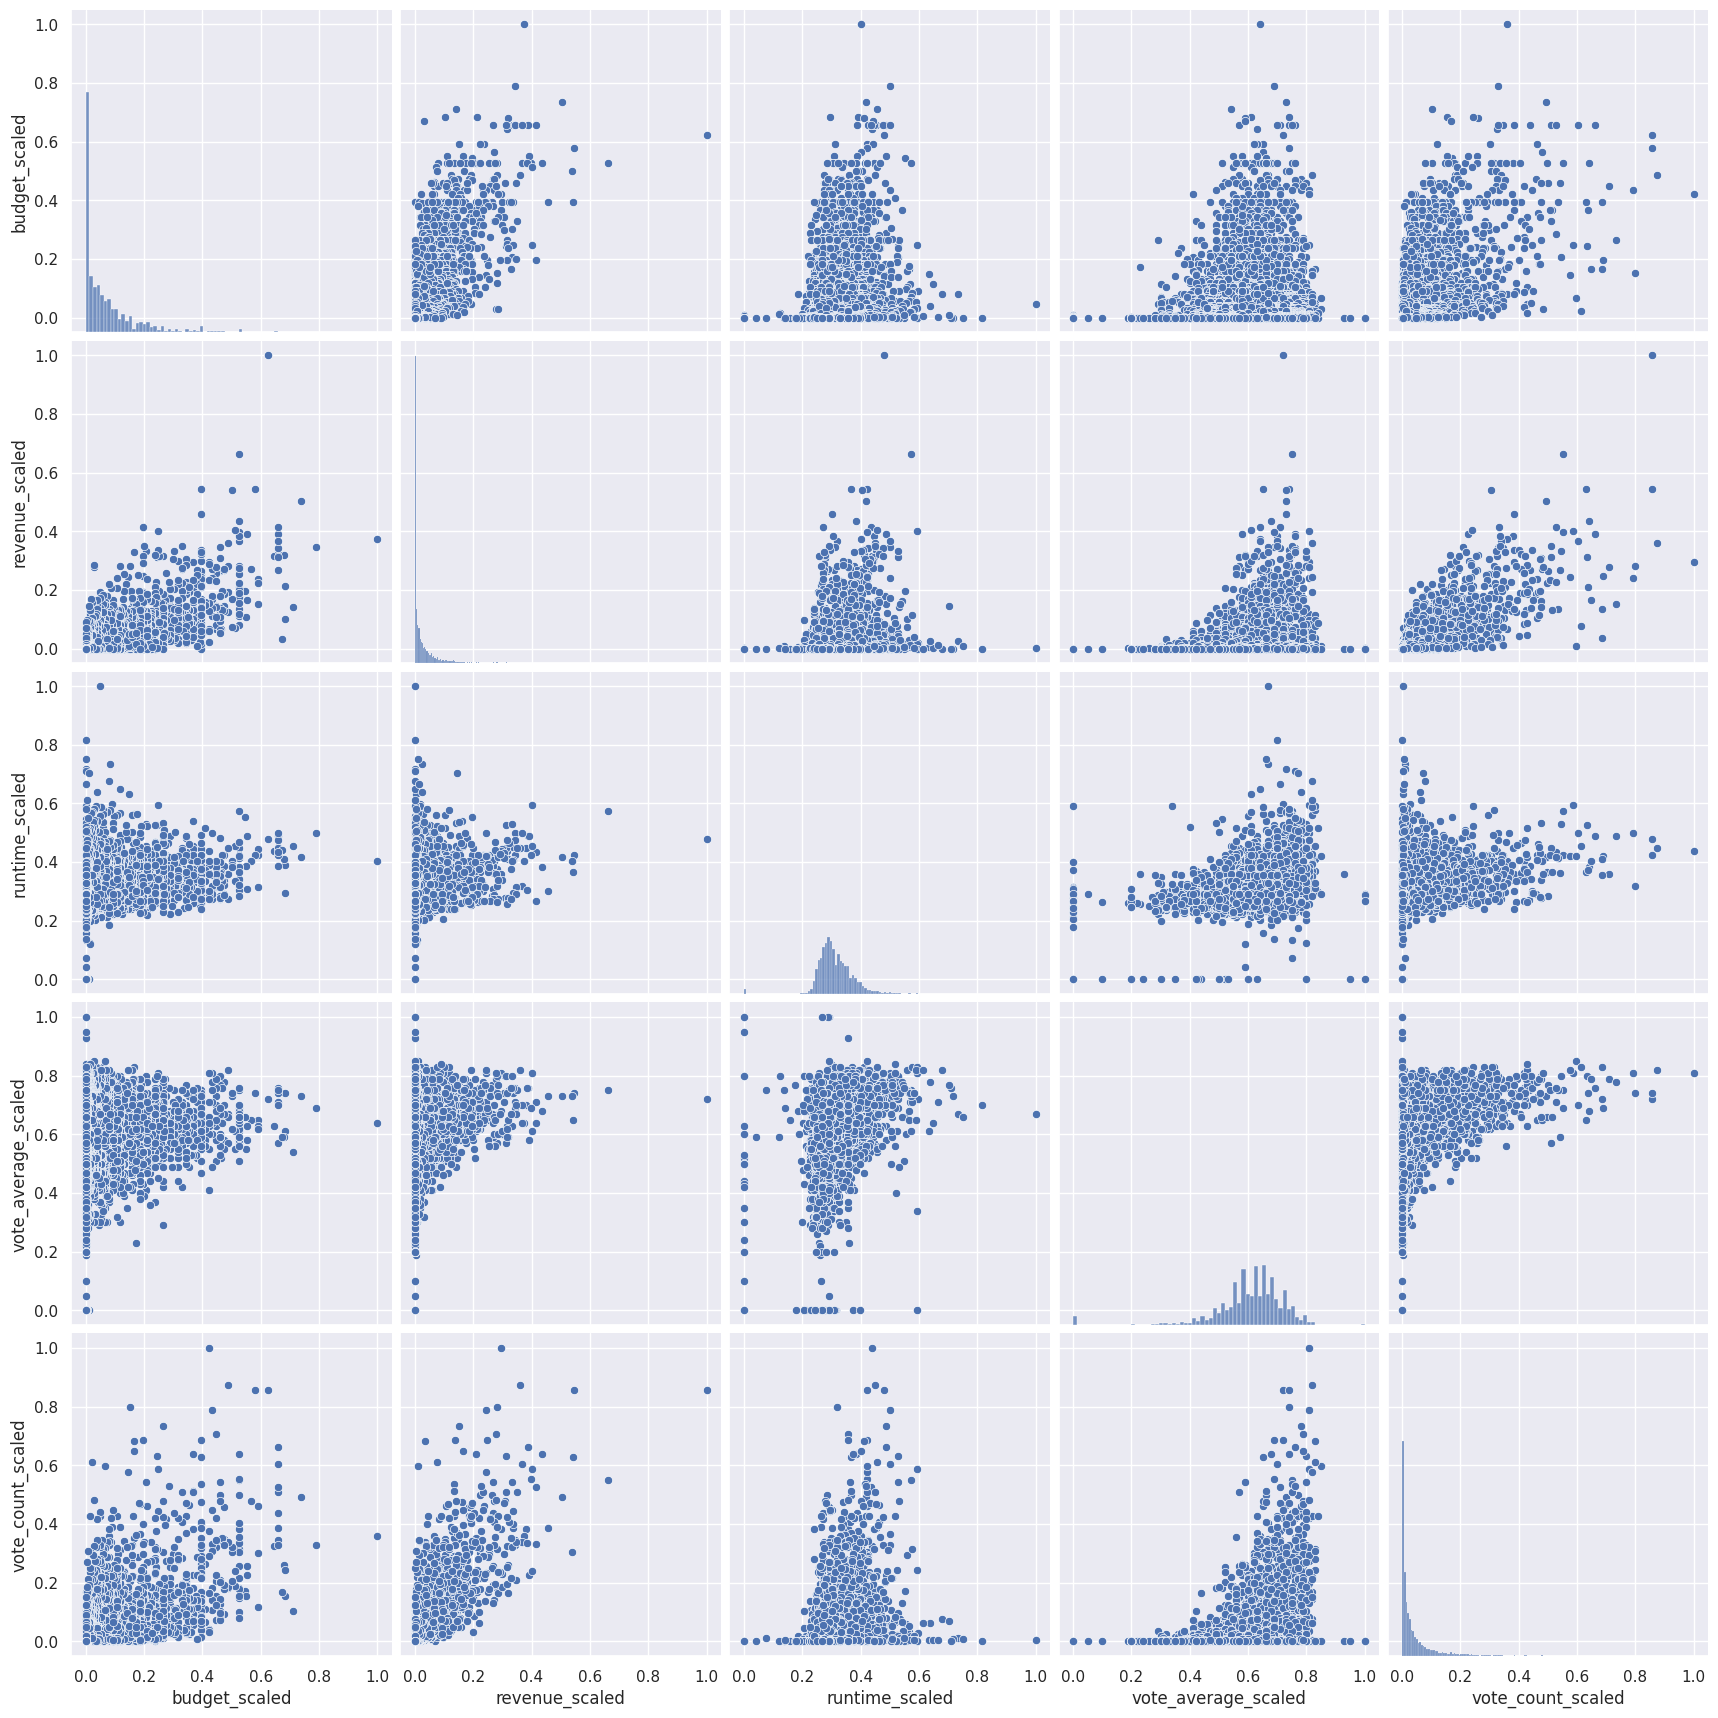

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

""" Scale the numeric columns for pairplot"""

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# numeric_columns = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']
# df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df['budget_scaled'] = scaler.fit_transform(df[['budget']])
df['revenue_scaled'] = scaler.fit_transform(df[['revenue']])
df['runtime_scaled'] = scaler.fit_transform(df[['runtime']])
df['vote_average_scaled'] = scaler.fit_transform(df[['vote_average']])
df['vote_count_scaled'] = scaler.fit_transform(df[['vote_count']])

# Increase the plot size by specifying the height of the plots
sns.pairplot(df, 
             vars=['budget_scaled', 'revenue_scaled', 'runtime_scaled', 'vote_average_scaled', 'vote_count_scaled'], 
             
             height=3.5)  # Adjust the height as needed

plt.show()


Key observations from the pair plot:
- The higher budget does not relate to the higher revenue
- Also higher budget doesn't relate to the higher vote_average
- The revenue generated for some movies is directly affected by the vote_average for that movie.
- Runtime of the movie and revenue are showing great co-relation, i.e. very low or very high runtime lead to lower revenue.


<h3>2. Time-Series Analysis </h3>

/tmp/ipykernel_5004/4064949913.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


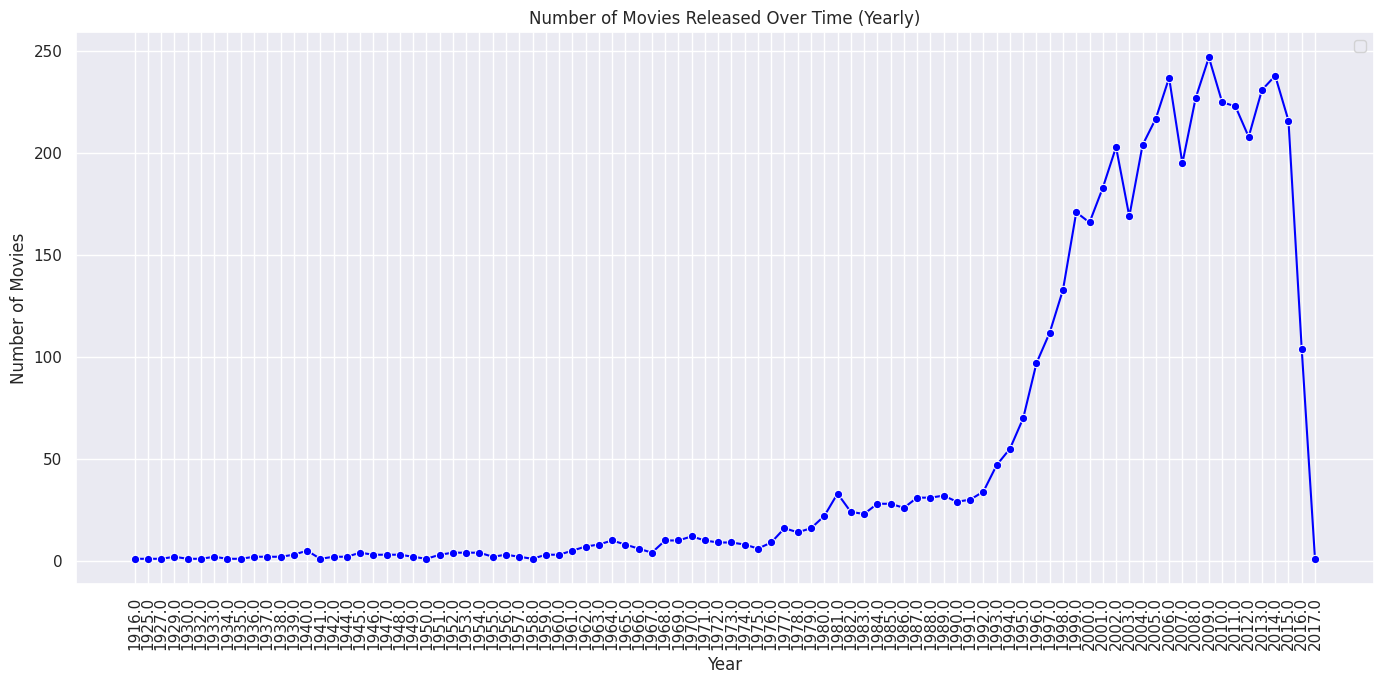

In [111]:
""" Plot the number of movies released each month """
# Group by year_month and count the number of movies released
movies_per_month = df.groupby('year').size()

# Plot the lineplot
plt.figure(figsize=(14, 7))
sns.lineplot(x=movies_per_month.index.astype(str), y=movies_per_month.values, marker='o', color='blue')
plt.title('Number of Movies Released Over Time (Yearly)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Observation from the plot:
- The number of movies released significantly increased overtime, revealing the information that the movies tend to be more successfull overtime.

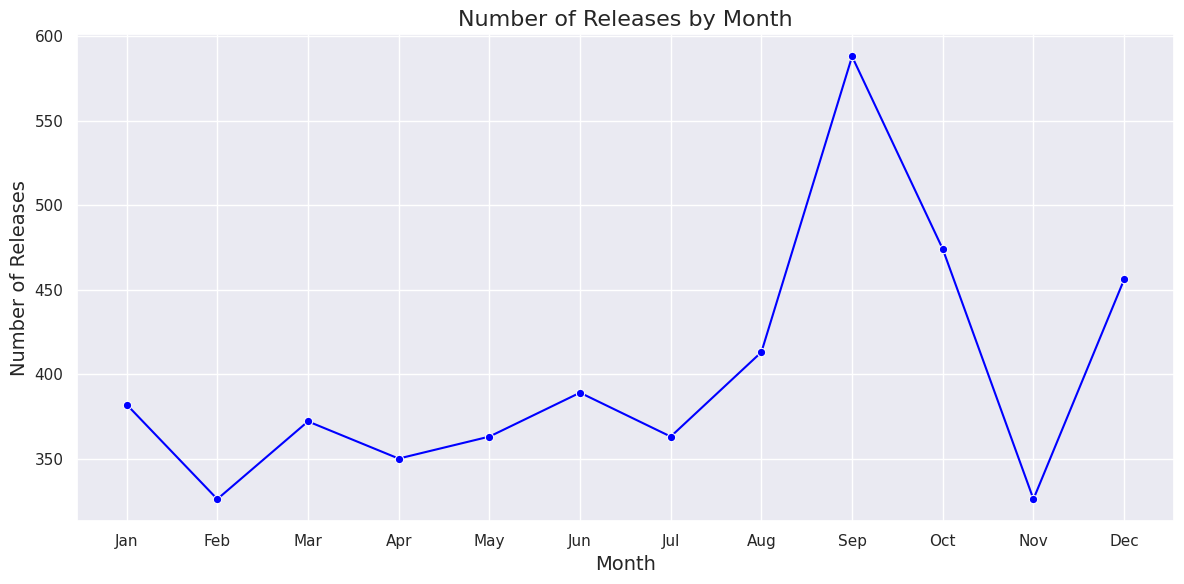

In [113]:
""" Monthly releases """

# Calculate the number of releases per month
monthly_releases = df.groupby('release_month').size()

# Plotting the average number of releases per month
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_releases.index, y=monthly_releases.values, marker='o', color='blue')

# Adding title and labels
plt.title('Number of Releases by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Releases', fontsize=14)

# Update x-ticks for month names
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.tight_layout()
plt.show()

Obeservation from the plot:
- There is unusal peak of the releases in the month of September. But September is not a holiday month (Which Contradicts with our hypothesis)

<h3> 3. Stacked Area Plot </h3>

/tmp/ipykernel_5004/348590821.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_genres['year'] = pd.to_numeric(df_top_genres['year'], errors='coerce')


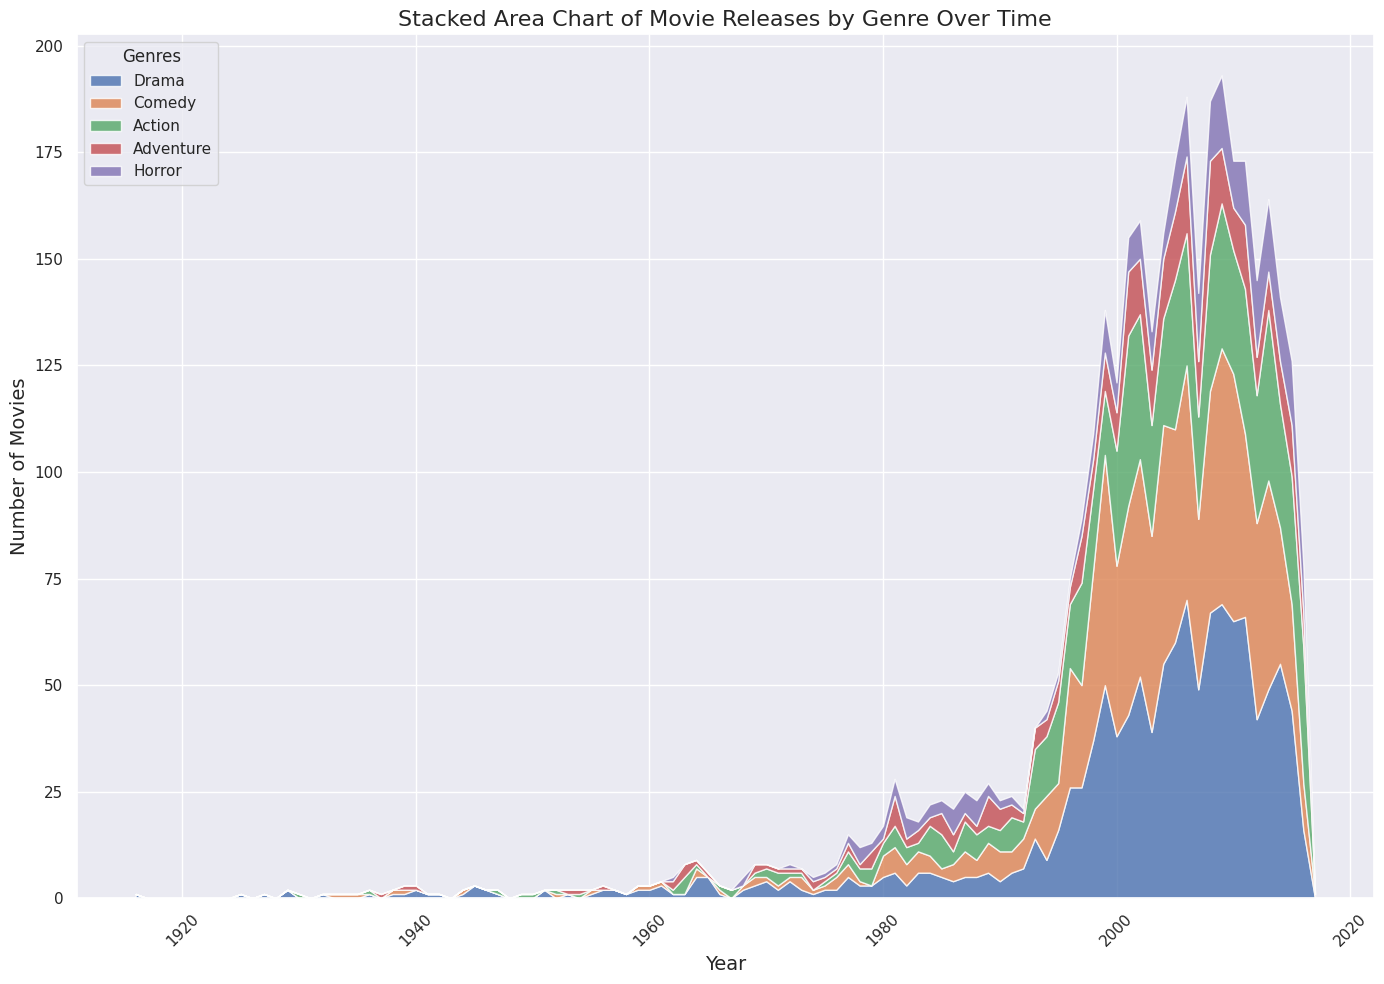

In [120]:

""" Stacked Area Chart """

# Filter the top genres
top_genres = df['primary_genre'].value_counts().nlargest(5).index
df_top_genres = df[df['primary_genre'].isin(top_genres)]

# Ensure 'year' is numeric and clean up any missing or invalid years
df_top_genres['year'] = pd.to_numeric(df_top_genres['year'], errors='coerce')

# Remove rows with invalid years (NaN)
df_top_genres = df_top_genres.dropna(subset=['year'])

# Get the min and max year values as integers
min_year = int(df_top_genres['year'].min())
max_year = int(df_top_genres['year'].max())

# Group data by genre and year, and count the number of movies in each group
yearly_counts = {
    genre: df_top_genres[df_top_genres['primary_genre'] == genre]
                .groupby('year')
                .size()
                .reindex(range(min_year, max_year + 1), fill_value=0)
    for genre in top_genres
}

# Get the years (the x-axis) from the first genre (assuming all genres have the same years)
years = yearly_counts[top_genres[0]].index

# Plotting the stacked area chart
plt.figure(figsize=(14, 10))

# Plot the stackplot
plt.stackplot(
    years,  # The x-axis (years)
    [yearly_counts[genre].values for genre in top_genres],  # The y values (number of movies per genre)
    labels=top_genres,  # Labels for each genre
    alpha=0.8
)

# Customize plot
plt.title('Stacked Area Chart of Movie Releases by Genre Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Genres')
plt.tight_layout()
plt.show()


Observation from the plot:
- Drama Action and Comedy genres have shown significant growth through out the years, which shows us that some genres are very favourite to the audiance.

<h3>4. Violin Charts </h3>

/tmp/ipykernel_5004/3453206178.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[df['director'].isin(top_directors)], x='director', y='vote_average', palette='viridis', split=False, gap=.1, inner="quart")


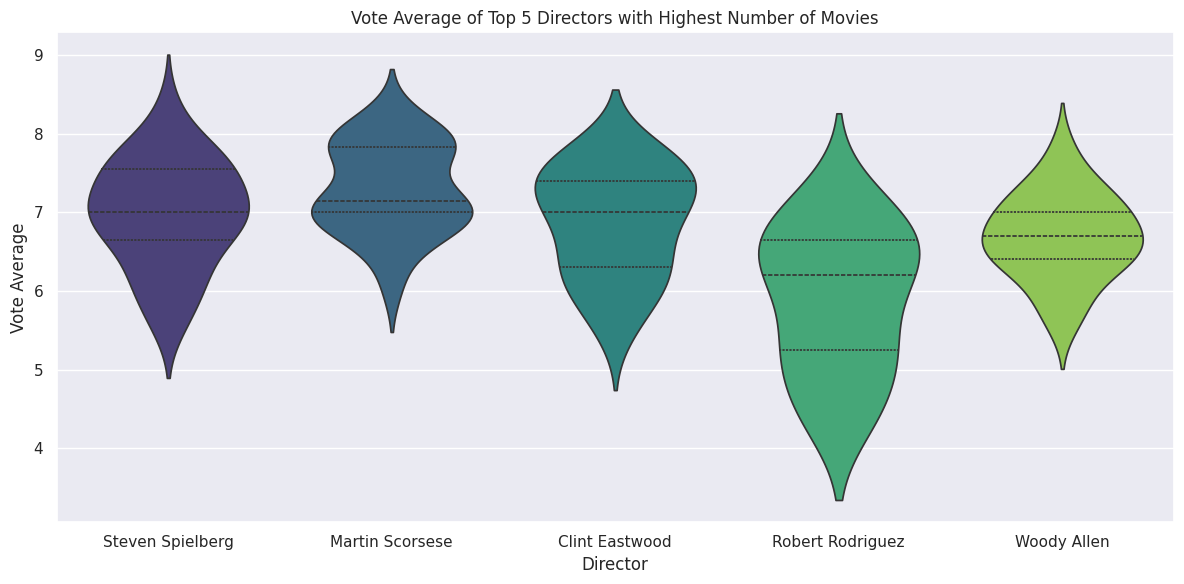

In [40]:
""" Plot the violin plot of the vote average of the top 5 directors with highest number of movies """

top_directors = df['director'].value_counts().nlargest(6).index
top_directors = top_directors[top_directors != 'Unknown']  # Exclude 'Unknown' if present
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[df['director'].isin(top_directors)], x='director', y='vote_average', palette='viridis', split=False, gap=.1, inner="quart")
plt.title('Vote Average of Top 5 Directors with Highest Number of Movies')
plt.xlabel('Director')
plt.ylabel('Vote Average')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observation:
- Since for Steven Spilberg, Martin Scorsese and Clint Eastwood have higher vote_averge hence ideally they should have higher average_revenue

Lets Check that out !

/tmp/ipykernel_5004/2719725466.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=significant_profit_directors.index, y=significant_profit_directors.values, palette='viridis')


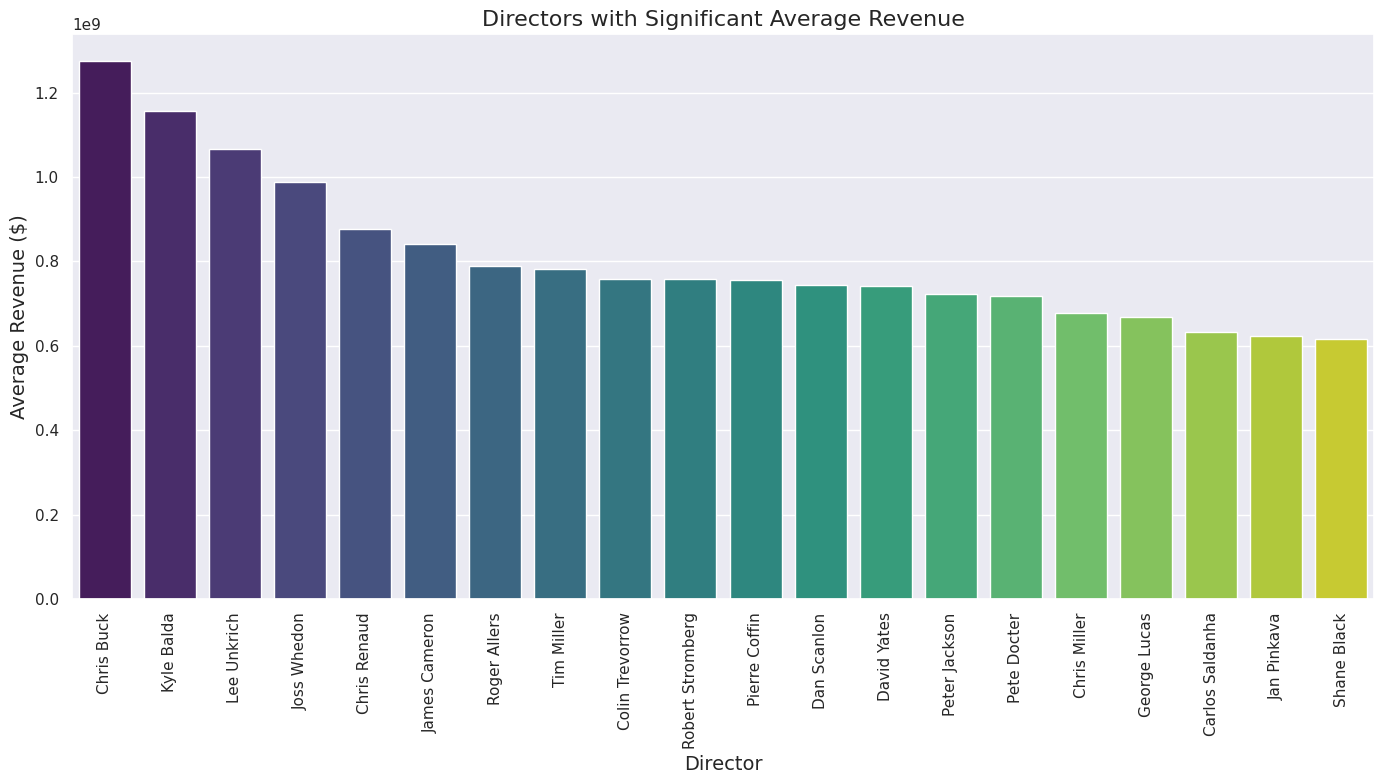

In [124]:
""" Plotting the profit gained by the top performing directors """
# Calculate average revenue, budget, and profit for the top 40 directors
avg_revenue_by_director = df.groupby('director')['revenue'].mean().sort_values(ascending=False).nlargest(40)
avg_budget_by_director = df.groupby('director')['budget'].mean().sort_values(ascending=False).nlargest(40)

# Calculate average profit (revenue - budget) by director
# avg_profit_by_director = avg_revenue_by_director - avg_budget_by_director

# Set a threshold for significant profit, for example, above the median profit
threshold = avg_revenue_by_director.median()

# Filter out directors with profit less than the threshold
significant_profit_directors = avg_revenue_by_director[avg_revenue_by_director > threshold]

# Plotting the bar plot for directors with significant profit
plt.figure(figsize=(14, 8))
sns.barplot(x=significant_profit_directors.index, y=significant_profit_directors.values, palette='viridis')

# Add title and labels
plt.title('Directors with Significant Average Revenue', fontsize=16)
plt.xlabel('Director', fontsize=14)
plt.ylabel('Average Revenue ($)', fontsize=14)
plt.xticks(rotation=90)  # Rotate director names for better readability

# Show the plot
plt.tight_layout()
plt.show()


But Steven Spilberg, Martin Scorsese and Clint Eastwood are not the one with higher average revenue, hence higher number of releases for the director doesn't constitute for higher average revenue.

Lets check the average profit for the genres

<h3> 5. Bar Plots for Revenue and Budget 

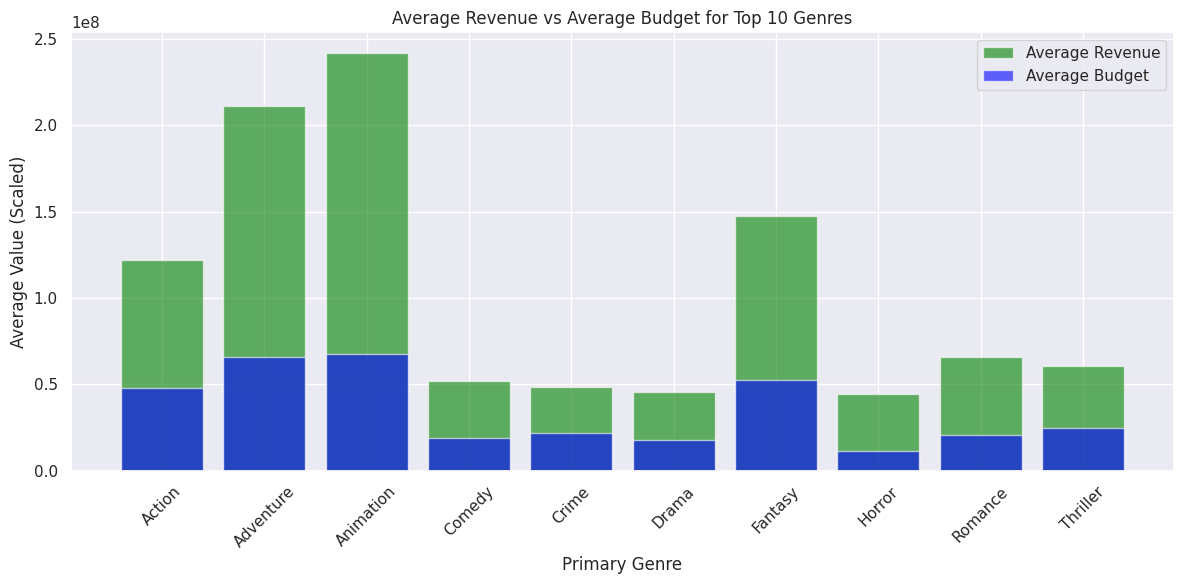

In [43]:
""" Matplotlib Bar chart of average revenue vs average budget for the top 10 genres """
top_genres = df['primary_genre'].value_counts().nlargest(10).index
avg_revenue_budget = df[df['primary_genre'].isin(top_genres)].groupby('primary_genre')[['revenue', 'budget']].mean().reset_index()
avg_revenue_budget.columns = ['primary_genre', 'avg_revenue', 'avg_budget'] 
plt.figure(figsize=(12, 6))
plt.bar(avg_revenue_budget['primary_genre'], avg_revenue_budget['avg_revenue'], label='Average Revenue', color= 'green',alpha=0.6)
plt.bar(avg_revenue_budget['primary_genre'], avg_revenue_budget['avg_budget'], label='Average Budget', color='blue',alpha=0.6)
plt.title('Average Revenue vs Average Budget for Top 10 Genres')
plt.xlabel('Primary Genre')
plt.ylabel('Average Value (Scaled)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The Animation and Adventure genre shows significant profit, hence the movies with genre adventure and animation should be very successfull.

<h3> 6. Correlation Matrix </h3>

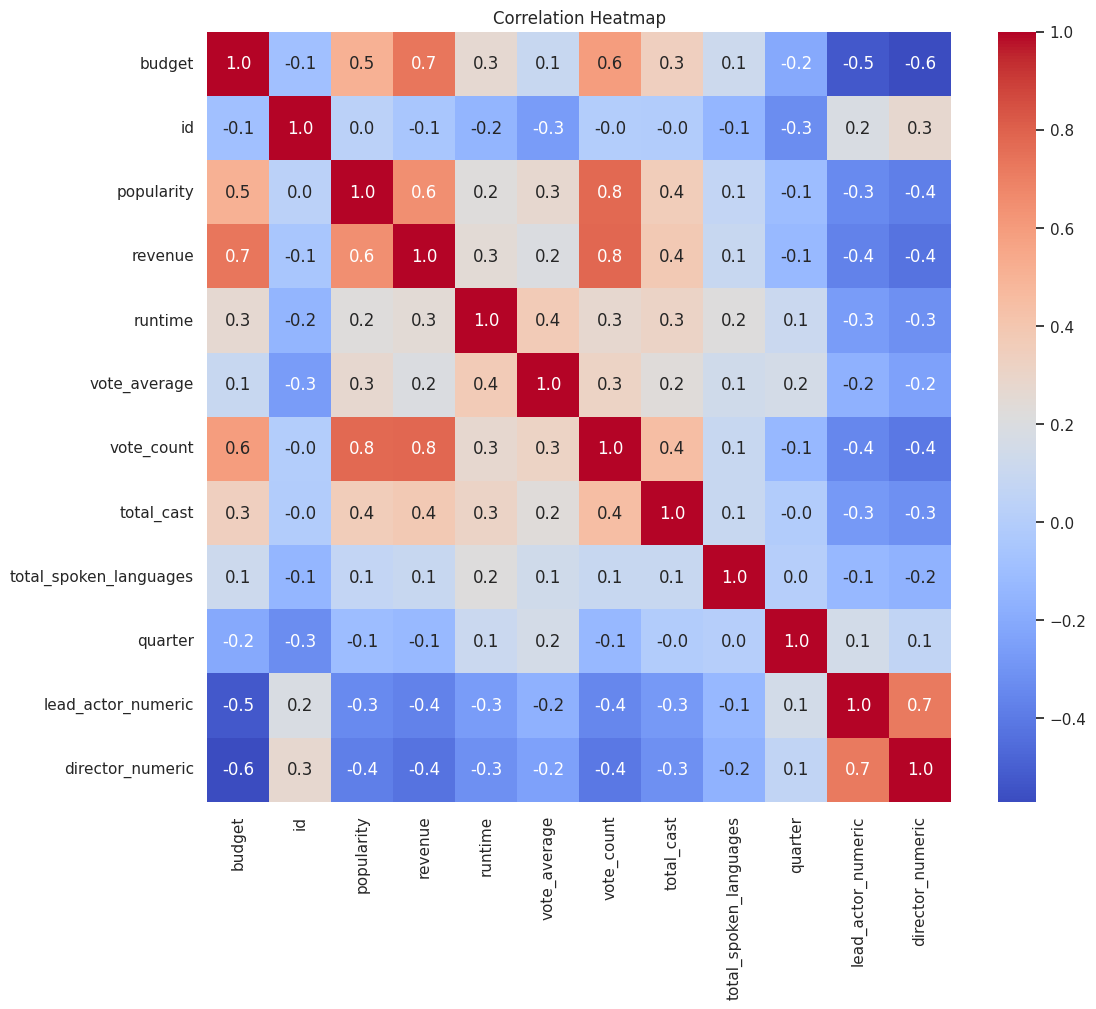

In [62]:
""" Plot the correlation matrix between the numerical value columns """

# sns heatmap
numeric_data = df.select_dtypes(include=["int64", "float64"])
# remove the scaled data columns
numeric_data = numeric_data.loc[:, ~numeric_data.columns.str.endswith('_scaled')]
plt.figure(figsize=(12,10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm',fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

Observations from the plot:
- popularity and budget shows high correlation which can be explained by the fact that, publicity will be costing a lot of money
- Revenue and budget also shows high positive coorelation
- Lead director and actor also has high correlation as the famous actor and director usually get paid more.
- Popularity and revenue shows high positive correlation.
- Popularity and vote count shows high positive correlation (straightforward)
- Revenue and vote count shows high positive correlation as the people who are voting must have watched the movie.
- Vote count shows correlation with lead actor and director as people tend to watch the movie based on the fact who is actor and director of the movie

<h3> 7. Histogram of Revenue vs Genre </h3>

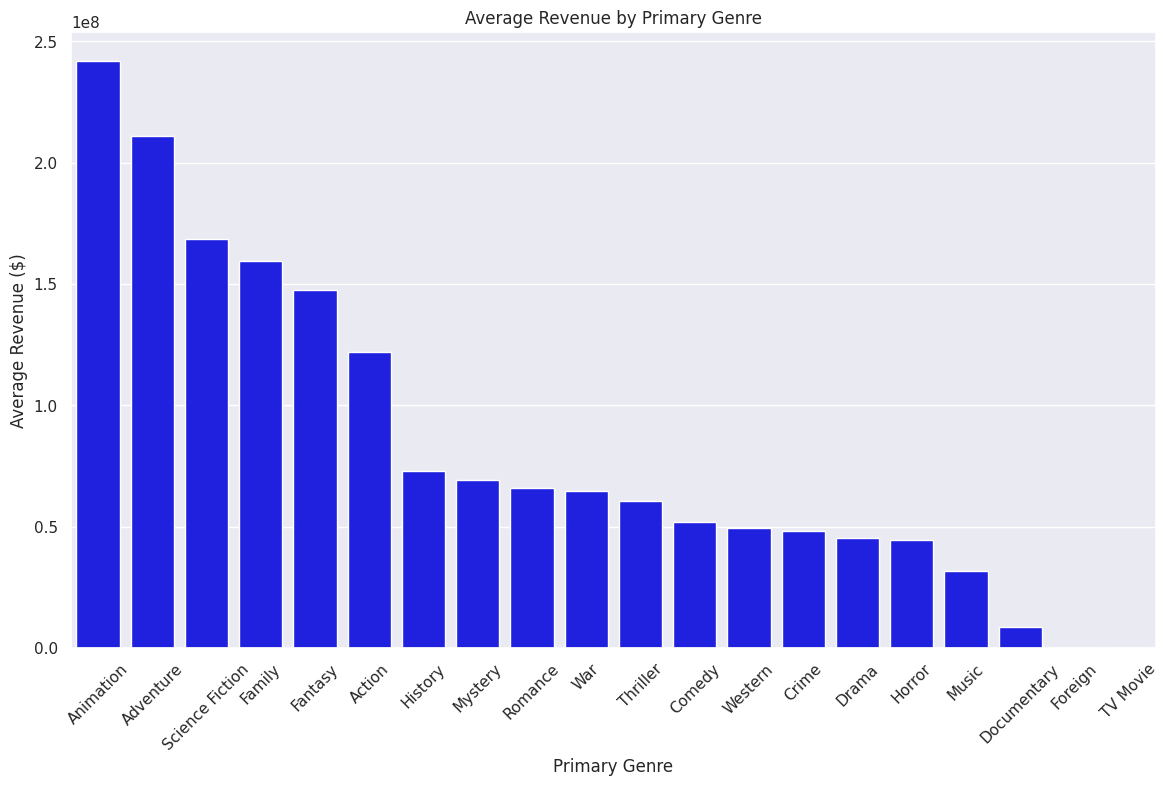

In [46]:
""" Bar plot of average revenue for primary genres """

# Bar plot: Average Revenue by Genre
avg_revenue_by_genre = df.groupby('primary_genre')['revenue'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x=avg_revenue_by_genre.index, y=avg_revenue_by_genre.values, color='blue')
plt.title('Average Revenue by Primary Genre')
plt.xticks(rotation=45)
plt.xlabel('Primary Genre')
plt.ylabel('Average Revenue ($)')
plt.show()

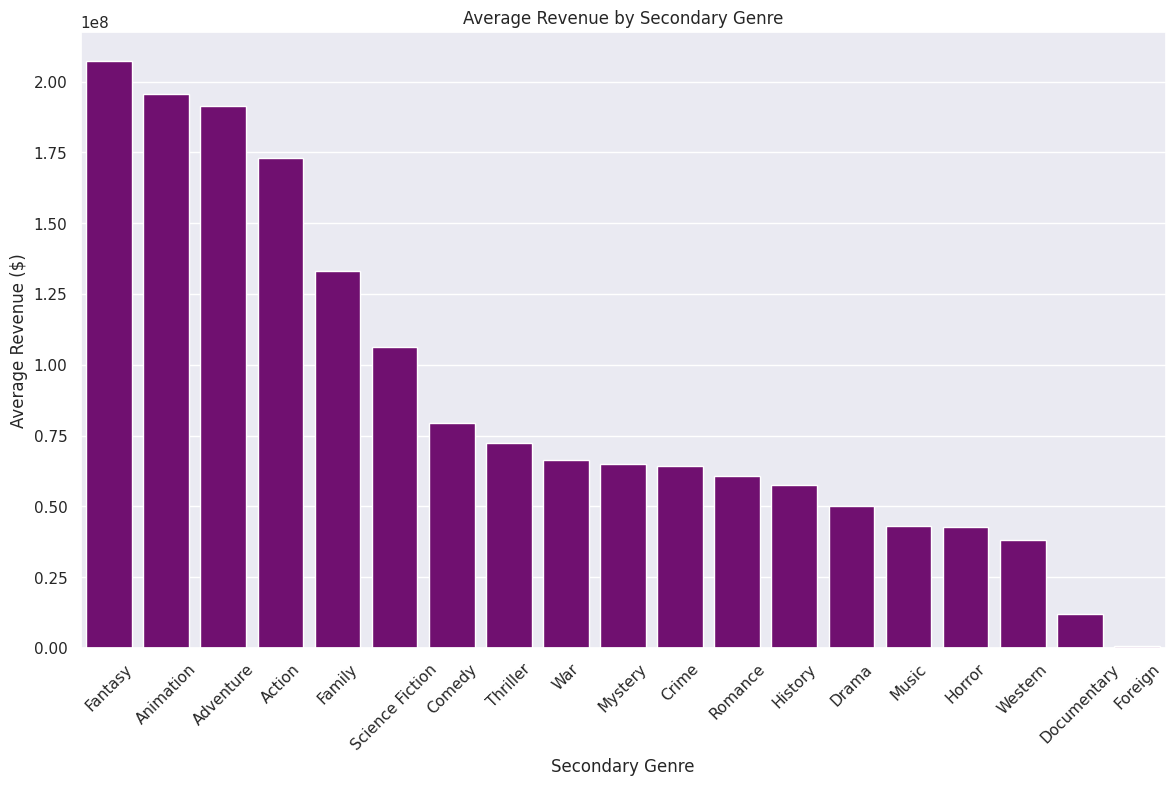

In [47]:
""" Bar plot of average revenue for secondary genres """

# Bar plot: Average Revenue by Genre
avg_revenue_by_genre = df.groupby('secondary_genre')['revenue'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x=avg_revenue_by_genre.index, y=avg_revenue_by_genre.values, color='purple')
plt.title('Average Revenue by Secondary Genre')
plt.xticks(rotation=45)
plt.xlabel('Secondary Genre')
plt.ylabel('Average Revenue ($)')
plt.show()

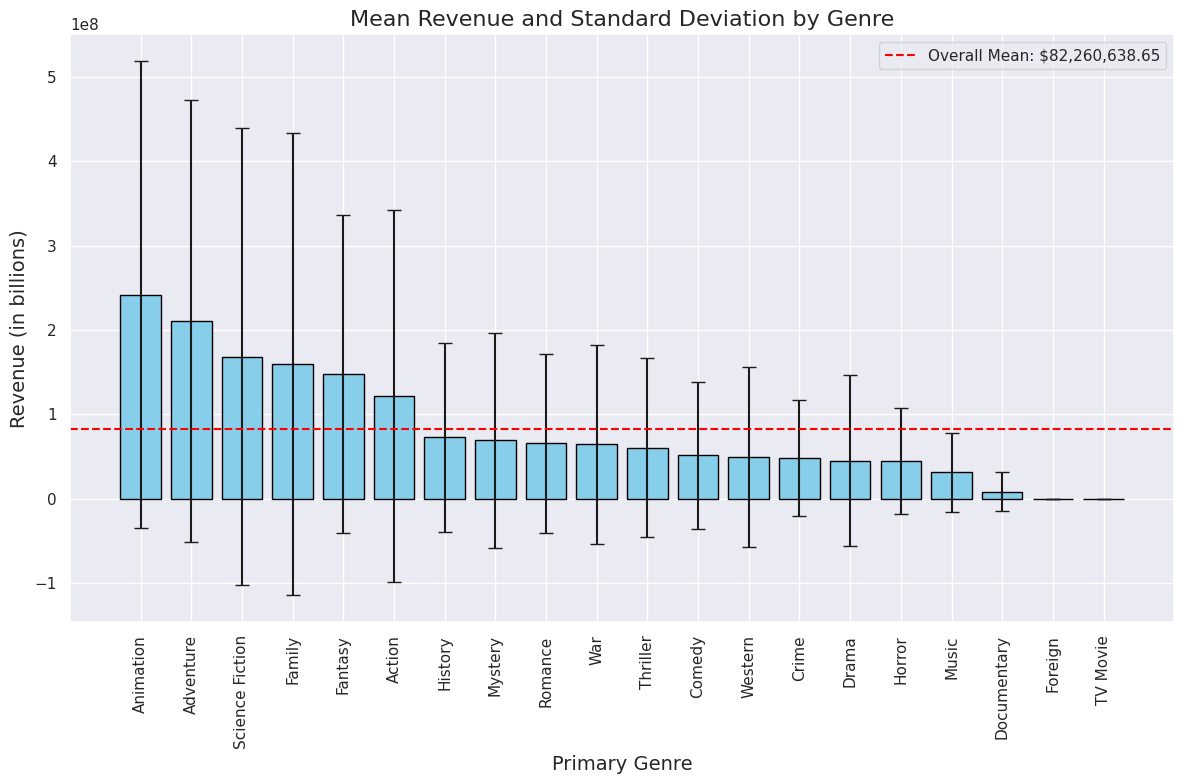

In [128]:
# Calculate the mean and standard deviation of revenue by primary genre
revenue_stats = df.groupby('primary_genre')['revenue'].agg(['mean', 'std']).reset_index()

# Sort the genres by mean revenue (optional)
revenue_stats = revenue_stats.sort_values(by='mean', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))

# Bar plot for mean revenue
bars = plt.bar(revenue_stats['primary_genre'], revenue_stats['mean'], 
               yerr=revenue_stats['std'], capsize=5, color='skyblue', edgecolor='black')

# Add the overall mean revenue line
overall_mean_revenue = df['revenue'].mean()
plt.axhline(y=overall_mean_revenue, color='red', linestyle='--', label=f'Overall Mean: ${overall_mean_revenue:,.2f}')

# Adding labels and title
plt.title('Mean Revenue and Standard Deviation by Genre', fontsize=16)
plt.xlabel('Primary Genre', fontsize=14)
plt.ylabel('Revenue (in billions)', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Add a legend for the mean line
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Our hypothesis gets stronger with the plots that some of the genres have very high revenue generation potential compared to others.

<h3> 8. Bar plot of Revenue vs the actors and directors

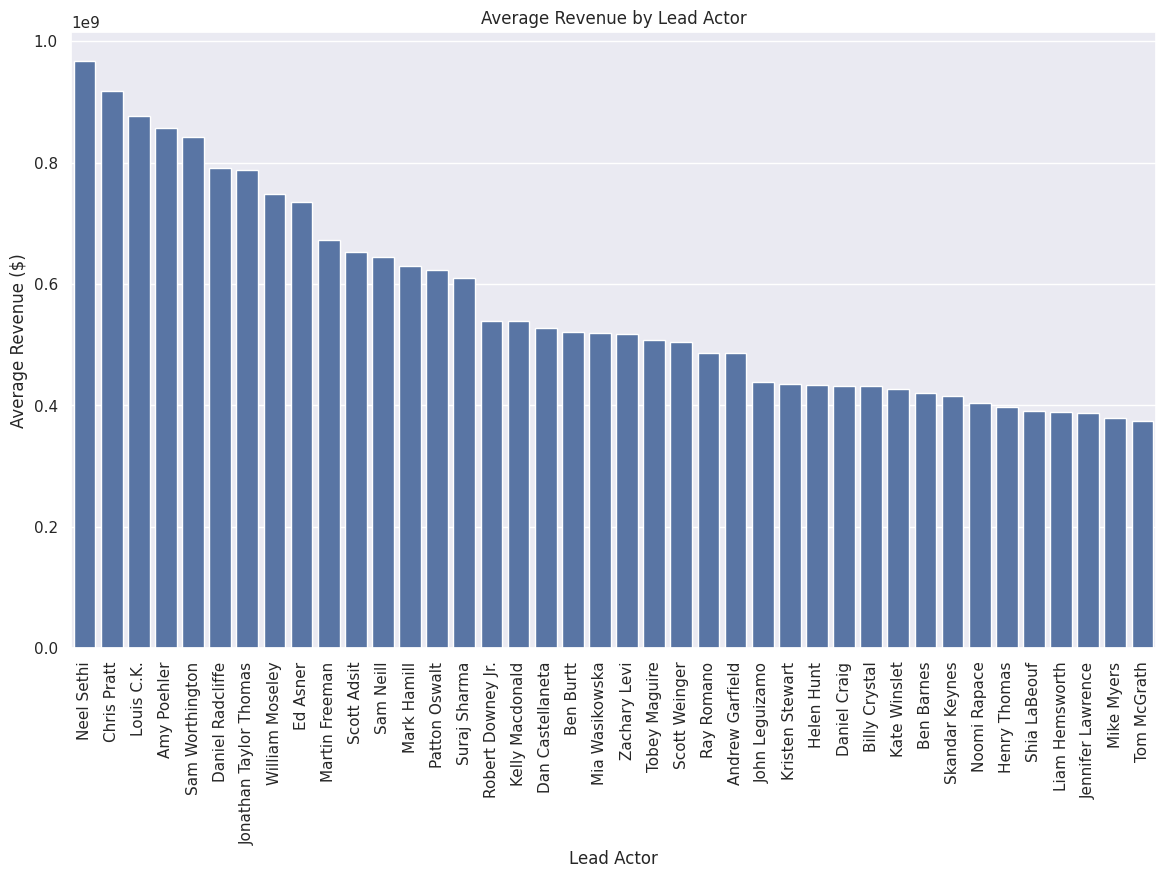

In [48]:
# Average revenue by lead actor (using factorized lead actor column)
avg_revenue_by_actor = df.groupby('lead_actor')['revenue'].mean().sort_values(ascending=False).nlargest(40)
plt.figure(figsize=(14, 8))
sns.barplot(x=avg_revenue_by_actor.index, y=avg_revenue_by_actor.values)
plt.title('Average Revenue by Lead Actor')
plt.xlabel('Lead Actor')
plt.ylabel('Average Revenue ($)')
plt.xticks(rotation=90)
plt.show()


/tmp/ipykernel_5004/3338144901.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_revenue_by_actor.index, y=avg_revenue_by_actor.values, palette='viridis')


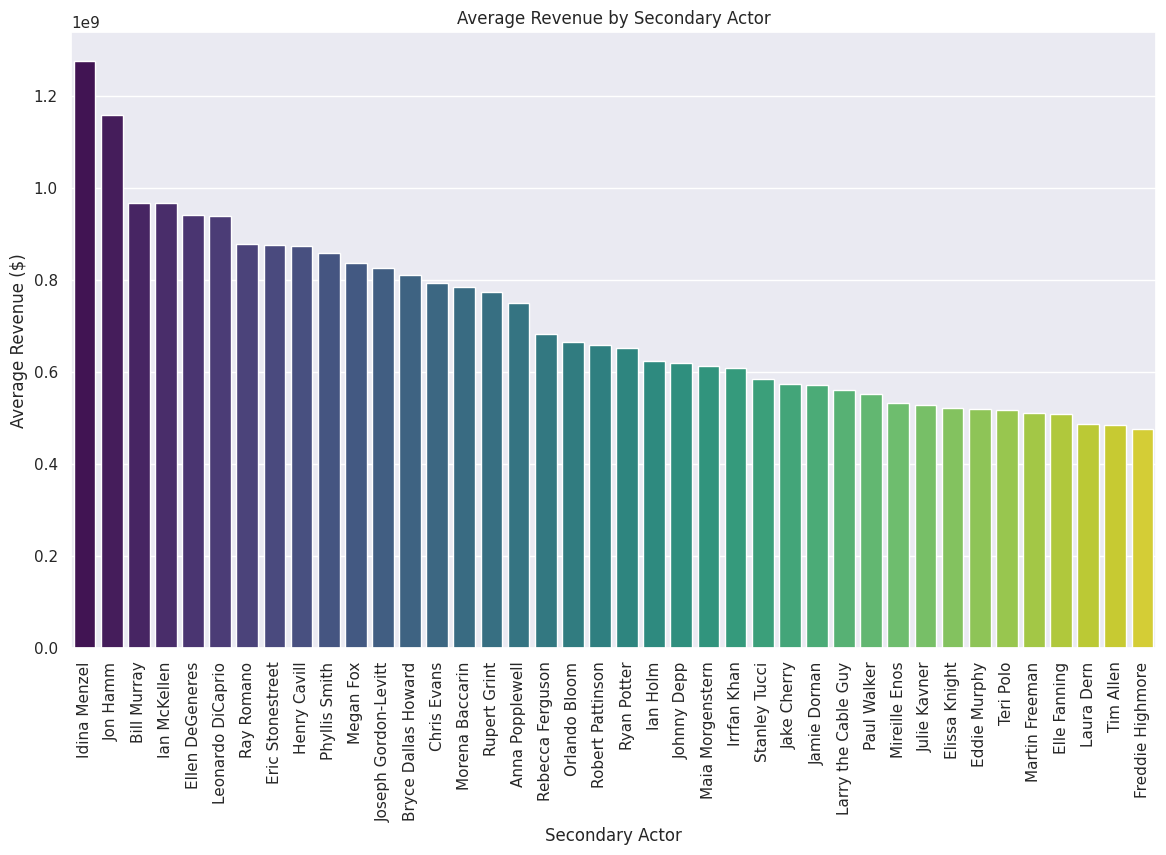

In [49]:
avg_revenue_by_actor = df.groupby('secondary_actor')['revenue'].mean().sort_values(ascending=False).nlargest(40)
plt.figure(figsize=(14, 8))
sns.barplot(x=avg_revenue_by_actor.index, y=avg_revenue_by_actor.values, palette='viridis')
plt.title('Average Revenue by Secondary Actor')
plt.xlabel('Secondary Actor')
plt.ylabel('Average Revenue ($)')
plt.xticks(rotation=90)
plt.show()

The hypothesis is also supported by the above plots that cast plays important role in revenue generation of the movie. There are few actors which have higher average revenue generation potential comapred to the others.

/tmp/ipykernel_5004/2992405317.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_50_actor_director_revenue.index, y=top_50_actor_director_revenue.values, palette='viridis')


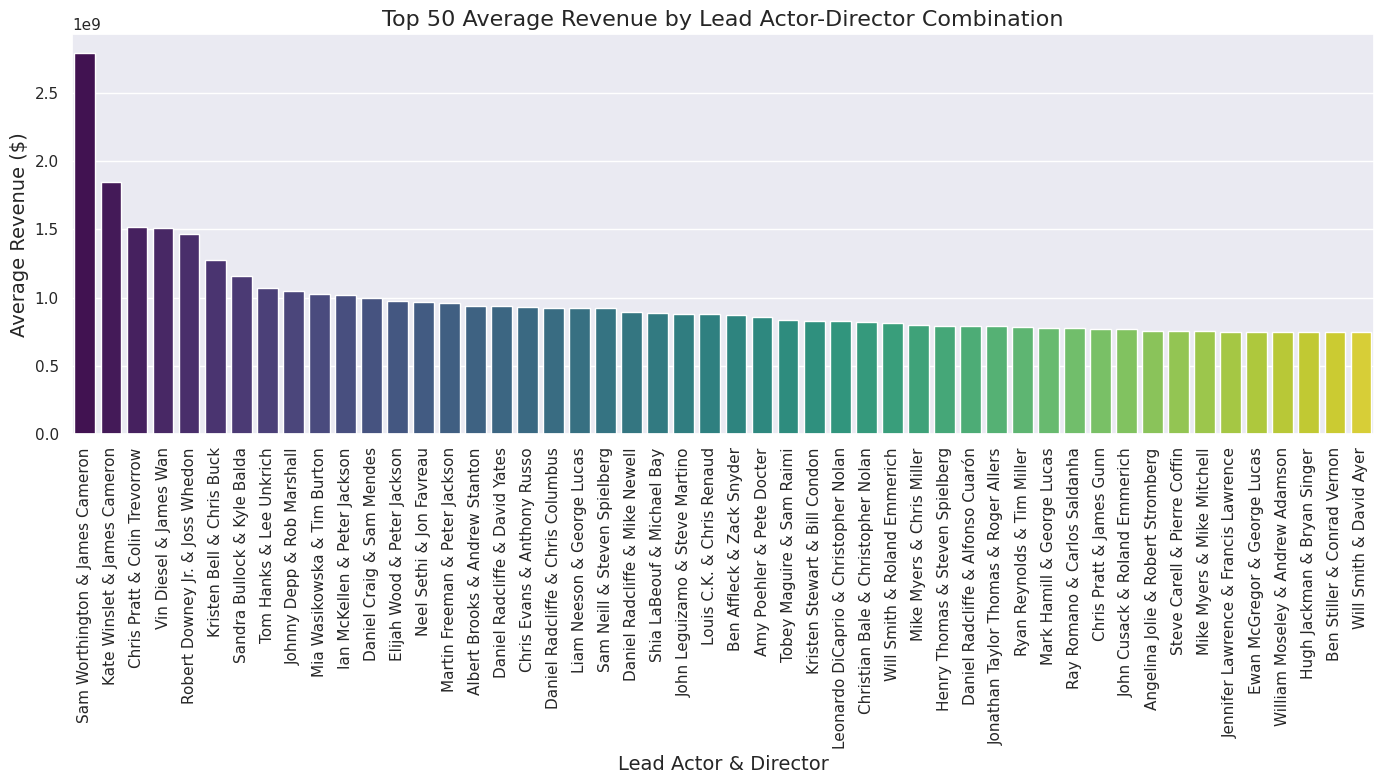

In [127]:

# Create a new column that combines lead actor and director
df['actor_director_combination'] = df['lead_actor'] + ' & ' + df['director']

# Group by lead actor-director combination and calculate the average revenue
actor_director_revenue = df.groupby('actor_director_combination')['revenue'].mean().sort_values(ascending=False)

# Select the top 50 pairs based on average revenue
top_50_actor_director_revenue = actor_director_revenue.head(50)

# Bar plot to show the average revenue for each lead actor-director combination
plt.figure(figsize=(14, 8))
sns.barplot(x=top_50_actor_director_revenue.index, y=top_50_actor_director_revenue.values, palette='viridis')
plt.title('Top 50 Average Revenue by Lead Actor-Director Combination', fontsize=16)
plt.xlabel('Lead Actor & Director', fontsize=14)
plt.ylabel('Average Revenue ($)', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()



Some Actor-Director pairs show higher average revenue but for rest of the plot its constant, hence the above plot partially supports our hypothesis

<h3> 9. Line plot of revenue vs release month

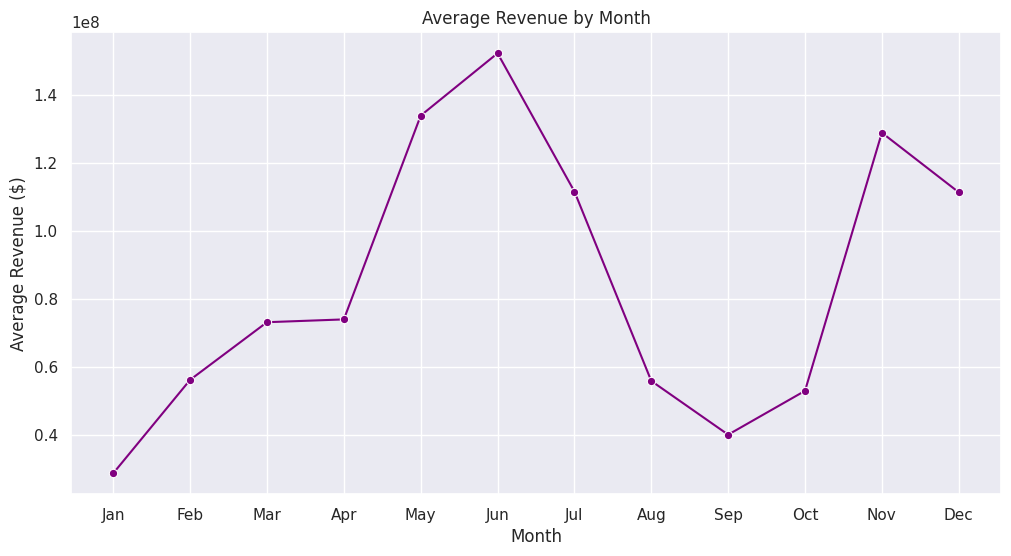

In [50]:
""" Trend between the average revenue monthwise """

df['release_month'] = df['release_date'].dt.month
monthly_avg_revenue = df.groupby('release_month')['revenue'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_avg_revenue.index, y=monthly_avg_revenue.values, marker='o', color='purple')
plt.title('Average Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Average Revenue ($)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


In the above plot the months of May-Jun and Nov show high average revenue hence there exists seasonality where the revenues earned are very high, hence it supports our hypothesis.

<h3> 10. Revenue vs Runtime scatter plot

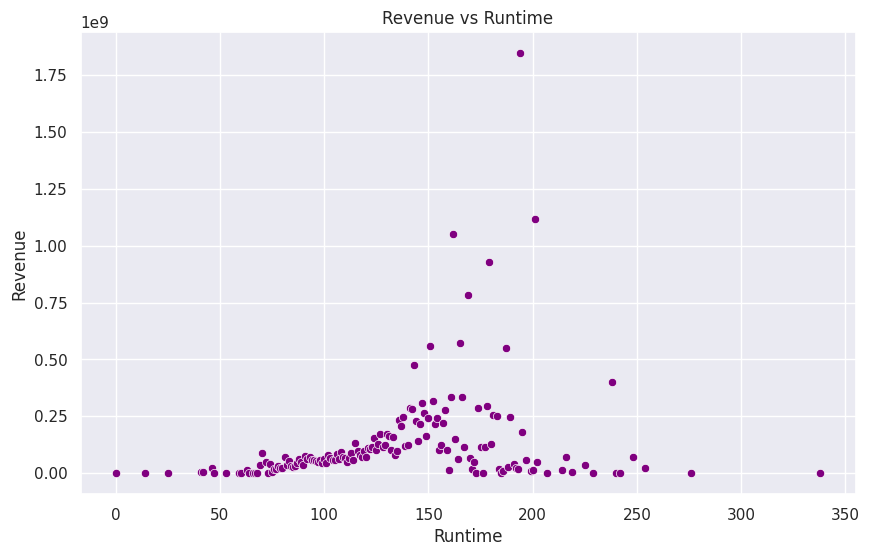

In [52]:
plt.figure(figsize=(10, 6))
avg_revenue_by_runtime = df.groupby('runtime')['revenue'].mean()
sns.scatterplot(x=avg_revenue_by_runtime.index, y=avg_revenue_by_runtime.values, marker='o', color='purple')
plt.title('Revenue vs Runtime')
plt.xlabel('Runtime')
plt.ylabel('Revenue')
plt.show()

The revenue shows somewhat weak relation with movie runtime, for higher and very lowr runtime the movis don't have high revenue, where as the average runtime for high revenue lies close to 150 mins

<h3> <b> Step 4. Conclusion </b> </h3>

The hypothesis proposed is partially supported by the plots where as some proposed points are proven invalid.
- The genre of the movie plays important role in movie's success.
- Actor and director comnination is partially true.
- The director with higher rating had no impact on its revenue generation
- The revenue highly affected by the popularity of the movie.
- The revenue shows seasonality trend as proposed in the hypothesis.
- Higher average rating have in general higher revenue.